<a href="https://colab.research.google.com/github/LukeZingg/MAT421/blob/main/Module_B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.4 - Lagrange Polynomial Interpolation**



*   Lagrange Polynomial Interpolation finds a single polynomial that passes through each point in our data.
*   The interpolation is often written as a linear combination of lagrange basis polynomials.



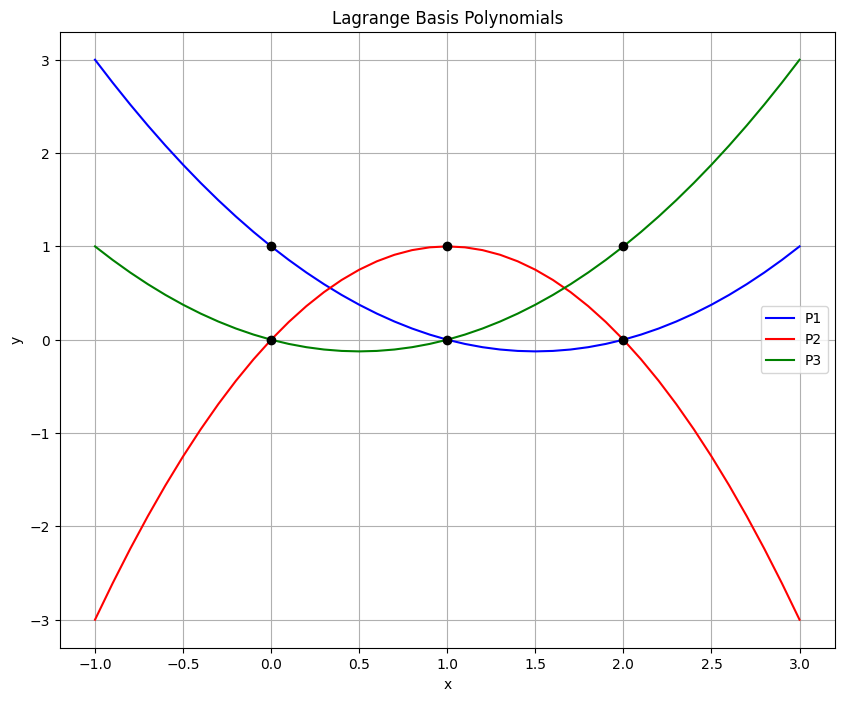

In [ ]:
#This generates multiple lagrange polynomial interpolations for a set of points:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()



*   Lagrange interpolation polynomials are defined outside the area of interpolation, but they are not reliable for extrapolation.
*   Python has a built in function to generate lagrange interpolation polynomials:

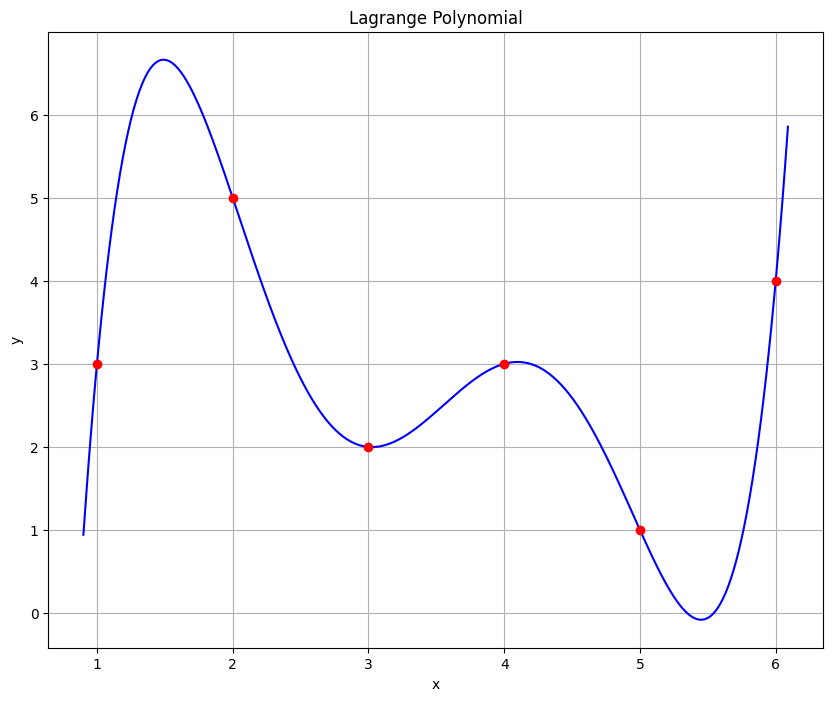

In [ ]:
from scipy.interpolate import lagrange

x = [1, 2, 3, 4, 5, 6]
y = [3, 5, 2, 3, 1, 4]

f = lagrange(x, y)

x_val = np.arange(.9, 6.1, 0.01)

fig = plt.figure(figsize = (10,8))
plt.plot(x_val, f(x_val), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**17.5 - Newton's Polynomial Interpolation**



*   Newton's Polynomial Interpolation is another way of generating a single polynomial that passes through each point in a dataset.
*   This method of interpolation can be useful as the process used to calculate the coefficients of the polynomial is mathematically simple.
*   Newton's polynomial interpolation has the advantage that once the coefficients are determined, adding new data points does not require recalculating the existing coefficients; rather, only the higher differences need to be calculated.





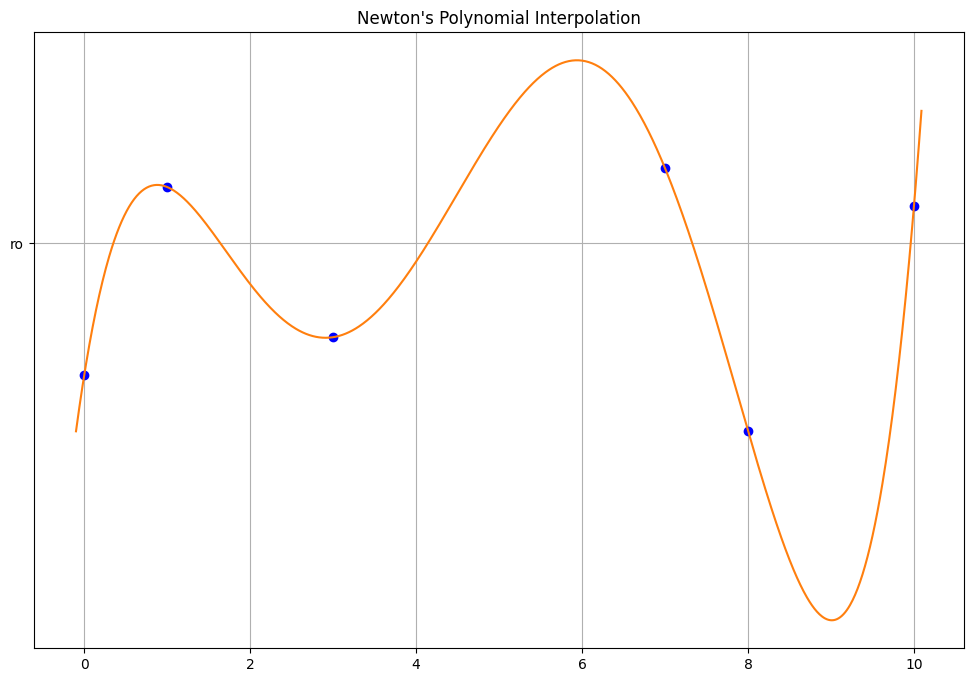

In [ ]:
#An example of generating Newton's Polynomial Interpolation

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


x = np.array([0, 1, 3, 7, 8, 10]) ; y = np.array([-7, 3, -5, 4, -10, 2])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-.1, 10.1, .01)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo', 'ro')
plt.plot(x_new, y_new)
plt.title("Newton's Polynomial Interpolation") ; plt.grid()
plt.show()